<a href="https://colab.research.google.com/github/DikshaGanotra/python/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE PROCESSING USING SUPPORT VECTOR MACHINE IN PYTHON** 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
cell_df = pd.read_csv('/content/cell_samples.csv')
cell_df.head()
cell_df.size
cell_df.shape
cell_df.count()
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

## DISTRIBUTION OF **CLASSES**: 

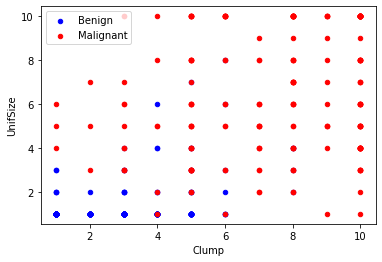

In [26]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant',ax=axes)

identifying  unwanted rows \columns


In [36]:
cell_df.dtypes
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [49]:
##removing unwanted columns

cell_df.columns

feature_df=cell_df[['Clump','UnifSize','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
##picked 9 columns
#x denotes independent variable
X = np.asarray(feature_df)
#y is a dependent variable
y = np.asarray(cell_df['Class'])



**dividing the data into training \testing**

In [60]:
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape
y_train.shape


(546,)

Modelling 

In [65]:
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)


**RESULT**

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

